# OLYMPICS ANALYSIS
 <font color ='red'>__SAITEJA NAKKA__<font>

__OLYMPICS__: The modern Olympic Games or Olympics are leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world's foremost sports competition with more than 200 nations participating.The Olympic Games are held every four years, with the Summer and Winter Games alternating by occurring every four years but two years apart.
__Source: Wikipedia__

The dataset has each and every olympic event. 

I'm going to do SOME LITTLE analysis on this data completely using only pandas.

You will be seeing lot of usage of groupby method.

__NOTE:__ Ignore __Spelling__ and __grammatical__ mistakes.

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab as plt
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(16,12)})

In [2]:
df = pd.read_csv(r"F:\athlete_events.csv\athlete_events.csv")
len(df)

271116

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


The dataset in pretty structured and clear.
- ID is the Unique indentifier of every participant.
- NOC is the National Olympic committe of their country.
- Team is the name of team that participated, generally it is name of country, but it might have old country names/ countries before partition etc and most importantly it ha team names of individual participants also

Lets see the Count of Team names and NOC.

In [6]:
print("Number of Nationalities -->",len(df.NOC.unique()))
print("Number of Teams -->",len(df.Team.unique()))

Number of Nationalities --> 230
Number of Teams --> 1184


I will show a glimpse of few team names.

In [127]:
df.Team.value_counts().tail() #Look at the odd Team names

Hb-20           1
Tournade-40     1
Tornade-16      1
Crocodile-13    1
Augsburg        1
Name: Team, dtype: int64

Check for Null values

In [158]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Some felt shy giving their Age, Height and Weight. Lol! Kidding. It represents data not recorded.

The Medal column has nan where the player in event has no awarded no Medal in that Event. Obviously the number will be high.

#### Lets look at the Medals distribution.

In [268]:
df.Medal.value_counts() 

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

Quite obvious that Gold,Silver and Bronze are almost equal

## Total number of Unique players participated in Olympics.

In [41]:
print("total number of Unique players participated in Olympics are -->",len(df.ID.unique()))

total number of Unique players participated in Olympics are --> 135571


You might be wondering that len(df) is 271116 which is more than number of players, it's because a single player might participate in different events and also in multiple olympics.

# NOTE:
Before any further analysis, I want you to notice the columns 'Games','Year' and 'Season'.
- There are 'Winter' and 'Summer' olympics.
- Summer Olympics started in 1896 while the Winter olympics started in 1924.
- From 1924 to 1994 both were held in same year, but from 1994 the Winter olympics are held two years prior.
- Winter olympics are nothing special, they have the games which are played/competed on ICE,SNOW like ice skating, ice hockey etc.

The code below explains !

In [393]:
print("SUMMER OLYMPICS WERE CONDUCTED IN ",np.array(sorted(df[df['Season'] == 'Summer']['Year'].unique())))

SUMMER OLYMPICS WERE CONDUCTED IN  [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012
 2016]


In [394]:
print("WINTER OLYMPICS WERE CONDUCTED IN ",np.array(sorted(df[df['Season'] == 'Winter']['Year'].unique())))

WINTER OLYMPICS WERE CONDUCTED IN  [1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984
 1988 1992 1994 1998 2002 2006 2010 2014]


## Number of Players participated in each olympics.

- Groupby year and ID, group using count()
- Taking only 'Year','ID' columns as groupby groups all the numerical columns which we dont need them here.
- as_index is false, which returns the grouping column as column, if true returns as index.

In [79]:
groupedYearID = df.groupby(['Year','ID'],as_index=False).count()[['Year','ID']]

In [80]:
groupedYearID = groupedYearID.groupby('Year',as_index=False).count()

In [110]:
groupedYearID.head()

,Year,ID
0,1896,176
1,1900,1224
2,1904,650
3,1906,841
4,1908,2024


## Club the winter olympics after 1992 to its next summer olympics.
- As explained above, you need to club them to because an olympic event is considered as combined summer and winter olympics.
- The following has two for loops because you cannot update the dataframe element without using iloc.
- But, to use iloc we need index, to get the index we used the loop.
- The second loop uses those index and changes(Adds) the year column by 2.
- So, 1994 becomes 1996, 1998 becomes 2000 and so on.

In [102]:
l = []
for i in [1994,1998,2002,2006,2010,2014]: #The year of winter olympics
    l.append(groupedYearID[groupedYearID.Year == i].index[0])

In [105]:
for i in l:
    groupedYearID.loc[i,'Year'] = groupedYearID.loc[i,'Year'] +2

In [108]:
groupedYearID = groupedYearID.groupby('Year',as_index=False).sum()

In [118]:
import matplotlib.pyplot as pyplot

Text(0,0.5,'PARTICIPANTS')

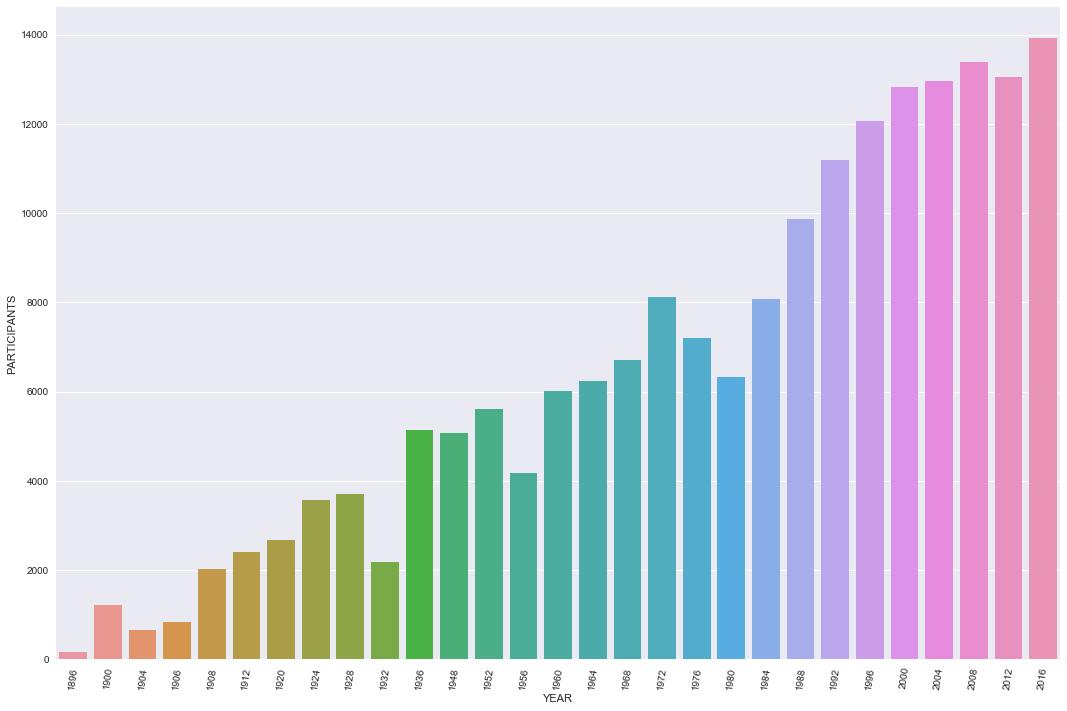

In [182]:
sns.set(rc={'figure.figsize':(18,12)})
plot1 = sns.barplot('Year','ID',data=groupedYearID).set_xticklabels(groupedYearID.Year,rotation=82)
#plot1.set(xlabel='YEAR',ylabel='Number of people')
pyplot.xlabel("YEAR")
pyplot.ylabel("PARTICIPANTS")

###  Number of participants in each olympics graph. (Shown Above)

#### Now, Lets do some Gender analysis
- To get the count, we need to convert the categorical Sex column to Numerical.
- There are many ways, I chose to do using get_dummies method.
- Groupby according to ID and Sex
- It might look complicated, so I advise you to run the same code in your kernel and print it to understand.

Create the dummies and add it to the dataframe. And then group it using Year and ID using Sum.

In [146]:
groupedGender = pd.concat([df,pd.get_dummies(df.Sex)],axis=1).groupby(['Year','ID'],as_index = False).sum()

We have grouped using sum, it will sum the M/F columns for each ID which is not correct. Look at head to understand.

In [148]:
groupedGender[['Year','ID','F','M']].head()

,Year,ID,F,M
0,1896,1724,0,2
1,1896,1725,0,2
2,1896,4113,0,1
3,1896,4116,0,1
4,1896,4189,0,1


In [149]:
groupedGender.F = groupedGender.F.apply(lambda x: 0 if x==0 else 1)
groupedGender.M = groupedGender.M.apply(lambda x: 0 if x==0 else 1)

Now, look at the head of dataframe.

In [152]:
groupedGender[['Year','ID','F','M']].head()

,Year,ID,F,M
0,1896,1724,0,1
1,1896,1725,0,1
2,1896,4113,0,1
3,1896,4116,0,1
4,1896,4189,0,1


In [153]:
groupedGender = groupedGender.groupby('Year',as_index=False).sum()

In [154]:
# same code as mentioned above some where, the years of winter olympics after 1994 to be clubbed to their next summer olympics.
for i in l:
    groupedGender.loc[i,'Year'] = groupedGender.loc[i,'Year'] +2

To sum the newly edited Year columns [1994,1998,2002,2006,2010,2014]

In [156]:
groupedGender = groupedGender.groupby('Year',as_index=False).sum()

Text(0,0.5,'PARTICIPANTS')

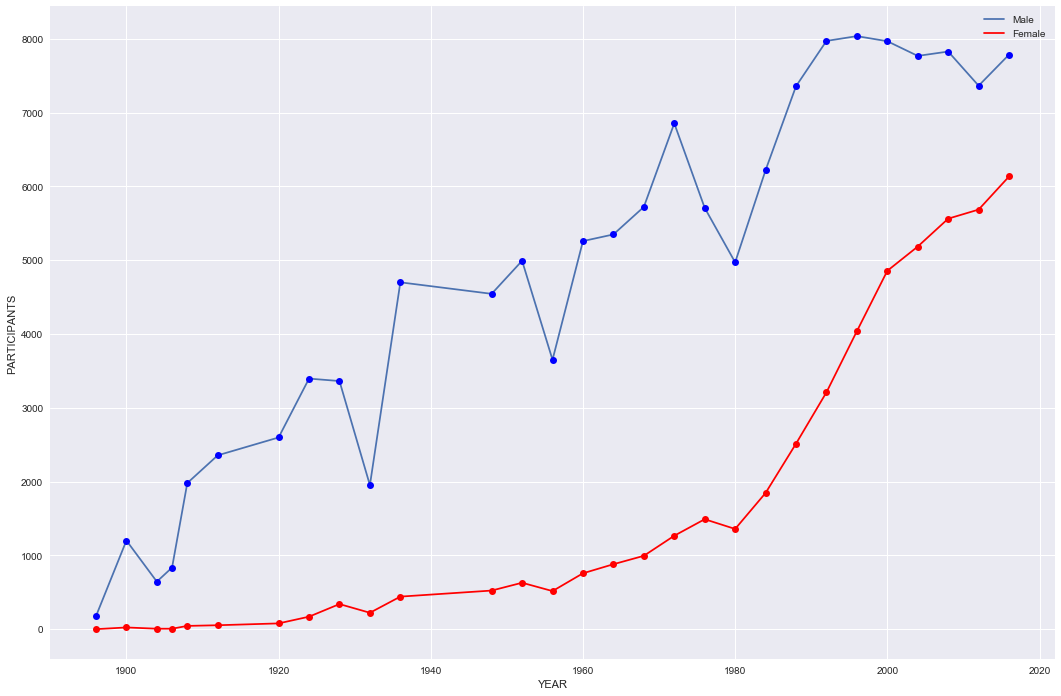

In [183]:
plt.plot(groupedGender.Year,groupedGender.M)
plt.plot(groupedGender.Year,groupedGender.F,color='red')

plt.plot(groupedGender.Year,groupedGender.M,'bo')
plt.plot(groupedGender.Year,groupedGender.F,'bo',color ='red')

plt.legend(['Male','Female'])
plt.xlabel("YEAR")
plt.ylabel("PARTICIPANTS")

# One good thing to notice is that the female participants are greatly increasing every year.  <font color = 'red'> WOMEN EMPOWERMENT 

## Lets create separate columns for gold,silver and bronze for easy analysis.
- Using get_dummies method.
- Add newcolumn allmedals, which represents if the player in event won any medal or not.

In [160]:
df = pd.concat([df,pd.get_dummies(df.Medal)],axis=1)

In [162]:
df['allmedals'] = df['allmedals'] = df['Bronze'] + df['Gold'] + df['Silver'] 
#Obviously it would be either 1 or 0. Added this column to make analysis easier

In [163]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0,0


## Countries with most number of medals won in all Olympics.
- Group by countries.
- Sort according to number of total medals and take top 50 of them.

In [177]:
groupcountry = df.groupby(by=['NOC'],as_index= False).sum()

In [179]:
top50 = groupcountry.sort_values(by=['allmedals'],ascending = False).head(50)

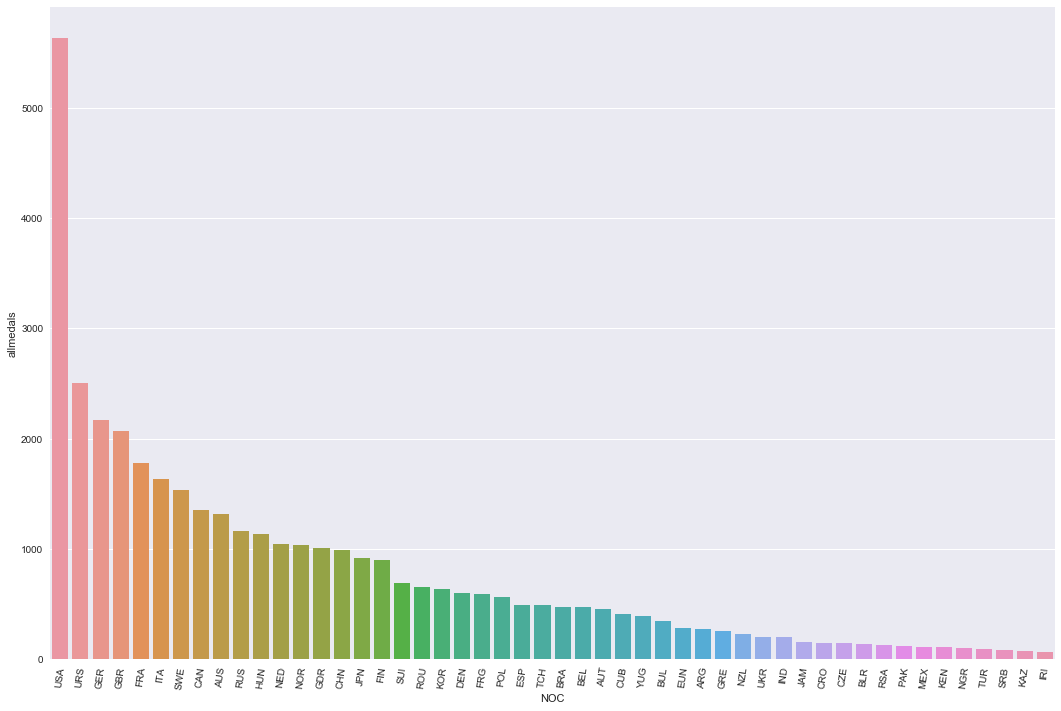

In [184]:
plot2 = sns.barplot('NOC','allmedals',data=top50).set_xticklabels(top50.NOC,rotation=82)

Complete United States dominance. We all know that USA have best atheletes. 

## Countries who won most medals in each year.
- Group by Year and NOC.
- Get in index of winter olympics after 1992 and club them to their next summer olympics(as we did before)
- Create a dummy dataframe and add the country with most medals that year.

In [200]:
groupYearNOC = df.groupby(by=['Year','NOC'],as_index=False).sum()

In [204]:
l1 = []
for i in [1994,1998,2002,2006,2010,2014]: #The year of winter olympics
    l1.append(np.array(groupYearNOC[groupYearNOC.Year == i].index))

In [210]:
for i in l1:
    groupYearNOC.loc[i,'Year'] = groupYearNOC.loc[i,'Year'] +2

In [213]:
groupYearNOC = groupYearNOC.groupby(by=['Year','NOC'],as_index=False).sum()

In [216]:
yeartop = pd.DataFrame() 
y = df.Year.unique() #Gets the Year numbers
for i in y:
    yeartop = pd.concat([yeartop,groupYearNOC[groupYearNOC['Year'] == i].sort_values(by=['allmedals'],ascending= False).head(1)])
    

- For a particular year, it sorts according to allmedals column in descending order, so the country with most medals that year will be at top. 
- So, taking head(1) means taking only the top row. 
- Then add to our new dataframe.

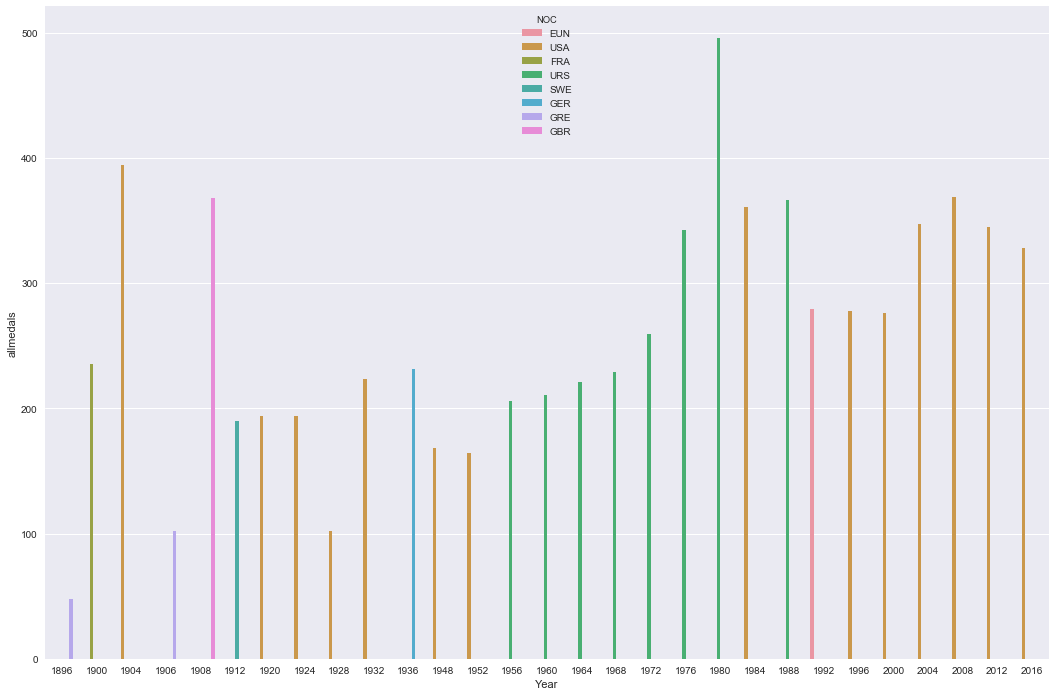

In [219]:
plot3 = sns.barplot('Year','allmedals',hue='NOC',data = yeartop)

The years and the country which dominated that olympics.
- Note 1: I'm considering the total medals won, but in general table top will be the one with most golds.
- Note 2: The group event medals are considered as only one medal, but I'm not doing that here,im taking total number of medals won.
- Example: If a team won a medal in football, which has 11 players (5+ sub players), wher each will be awarded a medal, but as per olympics it is considered as only one medal. In our case here, I'm considering the total medals.

## The Sport and the Country that dominated that sport.
- Groupby sport and NOC.
- Create a dummy dataframe and add the country with most medals in that sport.

In [227]:
groupsport = df.groupby(by=['Sport','NOC'],as_index=False).sum()

In [229]:
spotop = pd.DataFrame()
sp = df.Sport.unique()
for i in sp:
    spotop = pd.concat([spotop,groupsport[groupsport['Sport'] == i].sort_values(by=['allmedals'],ascending= False).head(1)])


In [230]:
spotop = spotop[['Sport','NOC','Bronze','Gold','Silver','allmedals']]
spotop

,Sport,NOC,Bronze,Gold,Silver,allmedals
632,Basketball,USA,36.0,281.0,24.0,341.0
2095,Judo,JPN,26.0,39.0,19.0,84.0
1626,Football,BRA,34.0,17.0,85.0,136.0
3612,Tug-Of-War,GBR,8.0,16.0,16.0,40.0
2964,Speed Skating,NED,41.0,40.0,36.0,117.0
1118,Cross Country Skiing,NOR,37.0,54.0,73.0,164.0
470,Athletics,USA,221.0,542.0,317.0,1080.0
1981,Ice Hockey,CAN,35.0,220.0,93.0,348.0
3170,Swimming,USA,175.0,649.0,254.0,1078.0
493,Badminton,CHN,23.0,28.0,13.0,64.0


The name of Sport and the country which dominated that Sport.

Lets, now look at the Sports where USA shows dominance.

In [233]:
set(spotop[spotop['NOC'] == 'USA']['Sport'])

{'Athletics',
 'Basketball',
 'Boxing',
 'Diving',
 'Figure Skating',
 'Freestyle Skiing',
 'Golf',
 'Roque',
 'Rowing',
 'Shooting',
 'Skeleton',
 'Snowboarding',
 'Swimming',
 'Wrestling'}

These are sports where USA dominated in olympics. I was expecting baseball in the list, but no it is not there? :0

Lets see who tops Baseball.

In [234]:
spotop[spotop['Sport']=='Baseball']

,Sport,NOC,Bronze,Gold,Silver,allmedals
556,Baseball,CUB,0.0,64.0,48.0,112.0


COOL! Didnt expect this one tho. CUBA

Lets see what all the sports that were played in Olympics so far.

In [235]:
df.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

Honestly! Didnt even know half of them.

## Lets see the average Age of players in each Olympics

In [305]:
dfage = df.groupby(['Year','ID'],as_index=False).mean()

- As, we have NaN in Age column, lets not consider them. The following fucntion does that.
- Groupby the mean 

In [306]:
dfage = dfage[np.isfinite(dfage['Age'])]

In [307]:
dfage = dfage.groupby('Year',as_index= False).mean()

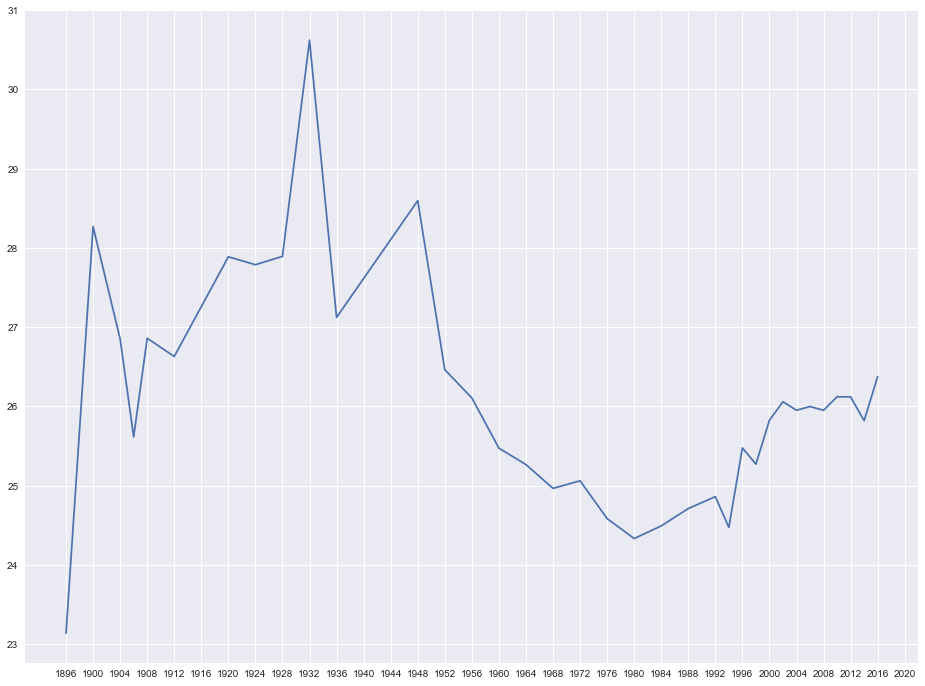

In [308]:
plt.plot(dfage.Year,dfage.Age)
plt.xticks(range(1896,2024,4))
plt.show()

### Plot of average age of players in each olympics

## Lets see the average Age,Height,Weight of players in their respective Sport

In [288]:
dfagesport = df.groupby(['Sport','ID'],as_index=False).mean()

In [292]:
dfagesport = dfagesport.groupby(['Sport'],as_index=False).mean()

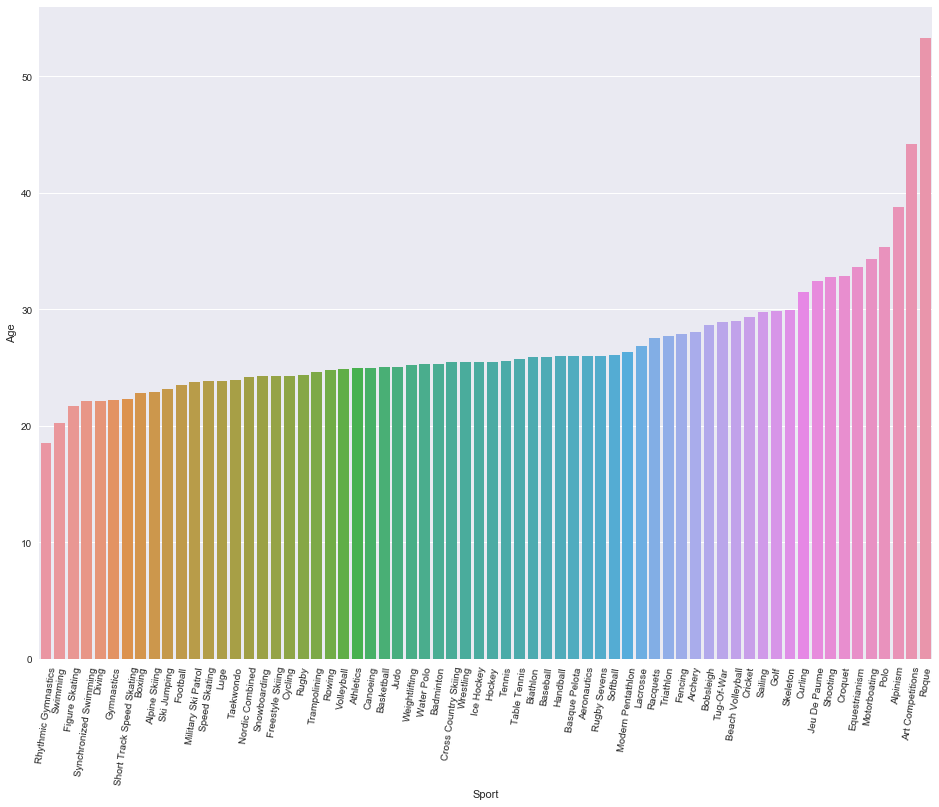

In [310]:
plot4 = sns.barplot('Sport','Age',data = dfagesport.sort_values('Age')).set_xticklabels(dfagesport.sort_values('Age').Sport,rotation=82)

#### The plot of Average of age of participants in each sport is shown above.
- To remove the Nan height columns, we do the following

In [312]:
dfheight = dfagesport[np.isfinite(dfagesport['Height'])]

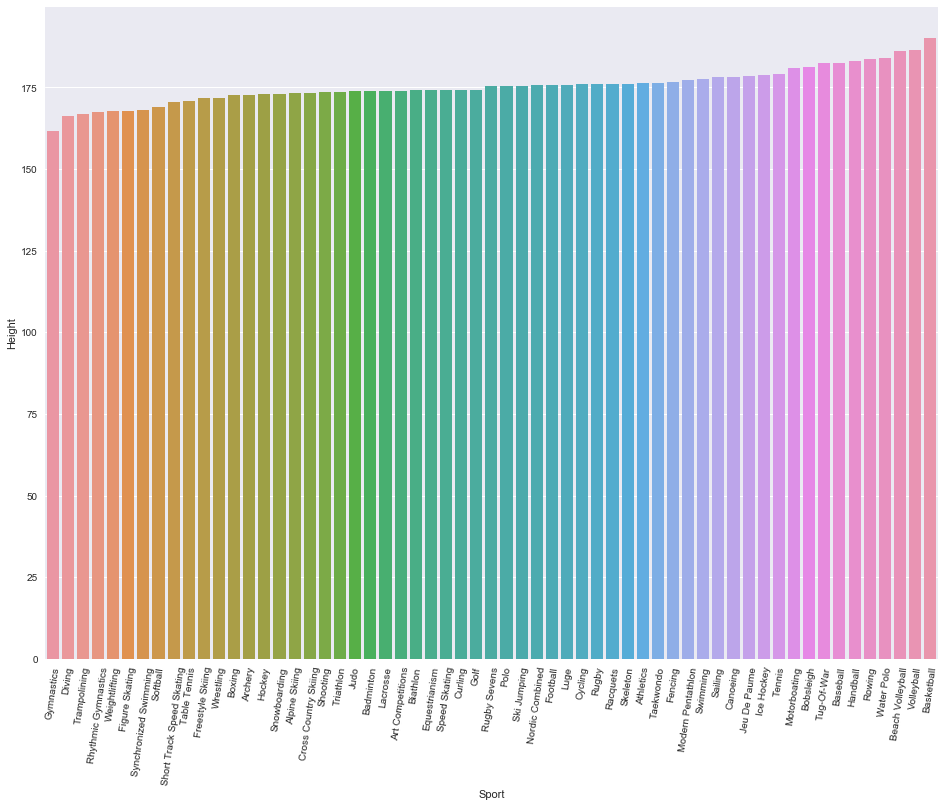

In [313]:
plot4 = sns.barplot('Sport','Height',data = dfheight.sort_values('Height')).set_xticklabels(dfheight.sort_values('Height').Sport,rotation=82)

### The plot of Average of Height of participants in each sport is shown above.


## Obviously, Basketball players are tall.

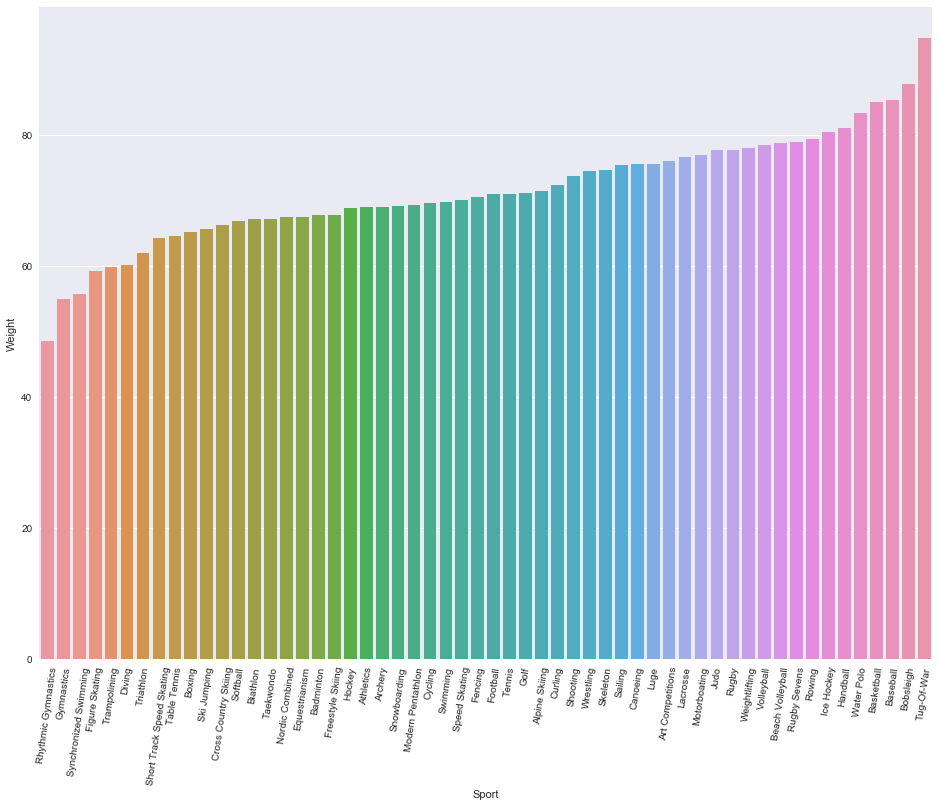

In [314]:
dfweight = dfagesport[np.isfinite(dfagesport['Weight'])]
plot4 = sns.barplot('Sport','Weight',data = dfweight.sort_values('Weight')).set_xticklabels(dfweight.sort_values('Weight').Sport,rotation=82)

### The participants of Tug-of-war(Now not a game of Olympics) are heavy, ummm...understandable.

#  <font color='red'> STATS ON/OF PARTICIPANTS. </font>

### Top 15 Participants as per most appearances any event in Olympics

In [164]:
df.Name.value_counts()[:15]

Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Joseph "Josy" Stoffel               38
Ioannis Theofilakis                 36
Takashi Ono                         33
Alfrd (Arnold-) Hajs (Guttmann-)    32
Andreas Wecker                      32
Alexandros Theofilakis              32
Jean Lucien Nicolas Jacoby          32
Alfred James Munnings               31
Alfred August "Al" Jochim           31
Michel Mathiot                      31
Johann "Hans" Sauter                31
Michael Fred Phelps, II             30
Yordan Yovchev Yovchev              30
Name: Name, dtype: int64

Shocking that he appeared more than 58 times. Lets look at his stats.

The number of times he won a medal.

In [173]:
df[(df.Name == 'Robert Tait McKenzie') & (df.allmedals == 1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
154806,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Bronze,1,0,0,1


Ooops! Only one medal in 58 appearances? Bad luck tho

## Top 10 Players with Most number of medals.

In [247]:
medals = df.groupby('Name',as_index=False).sum()

In [248]:
mostmed = medals.sort_values(by=['allmedals'],ascending=False)

In [249]:
mostmed.head(10)[['Name','Bronze','Gold','Silver','allmedals']]

,Name,Bronze,Gold,Silver,allmedals
86745,"Michael Fred Phelps, II",2,23,3,28
73140,Larysa Semenivna Latynina (Diriy-),4,9,5,18
93738,Nikolay Yefimovich Andrianov,3,7,5,15
118712,Takashi Ono,4,5,4,13
16202,Borys Anfiyanovych Shakhlin,2,7,4,13
95141,Ole Einar Bjrndalen,1,8,4,13
29509,Edoardo Mangiarotti,2,6,5,13
91718,Natalie Anne Coughlin (-Hall),5,3,4,12
111837,Sawao Kato,1,8,3,12
24893,"Dara Grace Torres (-Hoffman, -Minas)",4,4,4,12


#### The listed above players are top 10 (in order) players with most medals. Phelps tops the list with 28 :0 

Lets see how many players have won more than 10 medals(inclusive).

In [250]:
print("Number of players with more than 10 Medals", len(mostmed[mostmed.allmedals >= 10]))

Number of players with more than 10 Medals 37


### Players with most number of GOLD medals.

In [252]:
mostgold = medals.sort_values(by=['Gold'],ascending=False)
mostgold.head(10)[['Name','Gold']]

,Name,Gold
86745,"Michael Fred Phelps, II",23
104057,"Raymond Clarence ""Ray"" Ewry",10
83112,Mark Andrew Spitz,9
97002,Paavo Johannes Nurmi,9
73140,Larysa Semenivna Latynina (Diriy-),9
38069,"Frederick Carlton ""Carl"" Lewis",9
57801,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8
15392,Birgit Fischer-Schmidt,8
123399,Usain St. Leo Bolt,8
95141,Ole Einar Bjrndalen,8


### List of players who just lost the Gold more than 3 times in their career. By which I mean, players who have won Silver in that event.


In [257]:
mostmed[(mostmed.Silver) > (mostmed.Gold + 3)][['Name','Bronze','Gold','Silver','allmedals']]

,Name,Bronze,Gold,Silver,allmedals
37879,Franziska van Almsick,6,0,4,10
130225,Yang Yang,2,2,6,10
88187,Mikhail Yakovlevich Voronin,1,2,6,9
132337,Yury Yevlampiyevich Titov,3,1,5,9
7394,Andrea Ehrig-Schne-Mitscherlich,1,1,5,7
23794,Dagmar Hase,1,1,5,7
15838,Bogdan Musiol,1,1,5,7
77102,"Lszl Cseh, Jr.",2,0,4,6
125282,Viktor Nikitovich Lisitsky,0,0,5,5
87980,Miho Takeda,1,0,4,5


#### Number of people who won Medal but no Gold.

In [261]:
print("Number of people who won Medal but no Gold -->",len(mostmed[((mostmed.Silver) +( mostmed.Bronze) > 1) & (mostmed.Gold == 0)]))

Number of people who won Medal but no Gold --> 2589


#### People who won a mimum of 5 Medals but never a Gold. (Unlucky Atheletes)

In [266]:
mostmed[((mostmed.Silver) +( mostmed.Bronze) >= 5 ) & (mostmed.Gold == 0)][['Name','Bronze','Gold','Silver','allmedals']]

,Name,Bronze,Gold,Silver,allmedals
37879,Franziska van Almsick,6,0,4,10
86301,Merlene Joyce Ottey-Page,6,0,3,9
107062,Robert Rintje Ritsma,4,0,2,6
106258,Roald Morel Larsen,4,0,2,6
46363,Harri Tapani Kirvesniemi,6,0,0,6
77102,"Lszl Cseh, Jr.",2,0,4,6
36582,"Francis Joseph Edmund ""Frank"" De Beaurepaire",3,0,3,6
101501,Piero D'Inzeo,4,0,2,6
44309,Gustav Fischer,2,0,3,5
1385,"Adrianus Egbert Willem ""Arie"" de Jong",5,0,0,5


#### What? Franziska van Almsick has won 10 medals but it was never a Gold.

In [267]:
df[df.Name ==  'Franziska van Almsick'].head(1)[['Name','Sex','Age','Team','Sport']]

,Name,Sex,Age,Team,Sport
247932,Franziska van Almsick,F,14.0,Germany,Swimming


###### Can I call her the most unluckiest Olympic player ever? Thoughts?

### Youngest player to participate in olympics.

In [269]:
df[df.Age ==df.Age.min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,1,0,0,1


Gosh, he particiapted in Olympics at age of 10? LOl! Imagine what we were doing at age 10.
###### He also won a Medal in that. Which also makes him the Youngest to win a Medal in olympics.

### Oldest player to participate in olympics.

In [270]:
df[df.Age ==df.Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0,0,0,0


#### WHAT? really? at age 97? 
No actually, he died at age of 79(1910), his work*Art) was submitted in 1928 olympics. Not COOL, i dont count this.
#### Lets remove art competitions out of league.

In [271]:
dfnoart = df[df.Sport !='Art Competitions']

In [274]:
dfnoart[dfnoart.Age ==dfnoart.Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
233393,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot",NaN,0,0,0,0
233394,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot, Team",NaN,0,0,0,0
233395,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver,0,0,1,1
254475,127395,Arthur von Pongracz de Szent-Mikls und vr,M,72.0,NaN,NaN,Austria,AUT,1936 Summer,1936,Summer,Berlin,Equestrianism,"Equestrianism Men's Dressage, Individual",NaN,0,0,0,0
254476,127395,Arthur von Pongracz de Szent-Mikls und vr,M,72.0,NaN,NaN,Austria,AUT,1936 Summer,1936,Summer,Berlin,Equestrianism,"Equestrianism Men's Dressage, Team",NaN,0,0,0,0


### These two are the oldest dudes to participate ever in Olympics.
 Ohh wait! Oscar gomer won a silver. Sweet! Silver in shooting@ 72 YEARS.
#### Which also makes Oscar Gomer Swahn the Oldest Player to win a Medal.

# Players with highest success rates.
- Add new column count.
- Groupby ID or Name.
- Calculate the success rate (Medals won / count of appearances).

In [325]:
df['countnum'] = 1
succgrp = df.groupby('Name',as_index=False).sum()

In [326]:
succgrp['rate']  = succgrp['allmedals']/succgrp['countnum']
succgrp =succgrp.sort_values('rate',ascending = False)

### Players who participated in an event a minimum of 5 times and won medal each time they participated in an event.

In [327]:
succgrp1 = succgrp[succgrp['countnum'] > 5]
set(succgrp1[succgrp1['rate'] == 1.0]['Name'])

{'Aaron Wells Peirsol',
 'Danuta Kozk',
 'Doina Ignat',
 'Donald Arthur "Don" Schollander',
 'Eugenio Monti',
 'Frederick Carlton "Carl" Lewis',
 'Gary Wayne Hall, Jr.',
 'Iain Murray Rose',
 'Isabelle Regina Werth',
 'Jason Francis Kenny',
 'John Frederick Hencken',
 'Kathleen Genevieve "Katie" Ledecky',
 'Kim Su-Nyeong',
 'Kornelia Ender (-Matthes, -Grummt)',
 'Kristin Otto',
 'Lucien Alphonse Paul Gaudin',
 'Maria Valentina Vezzali',
 'Mariya Kindrativna Horokhovska',
 'Matthew "Matt" Grevers',
 'Natalie Anne Coughlin (-Hall)',
 'Nathan Ghar-Jun Adrian',
 'Paavo Johannes Nurmi',
 'Raymond Clarence "Ray" Ewry',
 'Rdiger Helm',
 'Rebecca Soni',
 'Renate Stecher (Meiner-)',
 'Rudolf Krpti',
 'Stephen Geoffrey "Steven" Redgrave',
 'Thomas Michael "Tom" Jager',
 'Tirunesh Dibaba Keneni',
 'Viktor Aleksandrovich Sidyak',
 'Viorica Daniela Siliva (-Harper)',
 'Wolfgang Hoppe',
 'Wu Minxia',
 'Zoltn Imre dn von Halmay'}

### LEGENDS !!! I SAY! 100% Success rate bruh!!

### Wondering why there is no Micheal phelps name in this list? 
Well, he is legend who have 28 medals out of 30 events he participated, which means he has a success rate of 28/30 = 93%.
##### I'm only considering people with 100% hit rate.

## People who won Gold in each event they participated a minimum of 4 occasions.

In [329]:
succgrp2 = succgrp[succgrp['countnum'] > 4]
for i in range(len(succgrp2)):
    if (succgrp2.iloc[i].Gold ==  succgrp2.iloc[i]['countnum']):
        print(succgrp2.iloc[i].Name)

Svetlana Alekseyevna Romashina
Raymond Clarence "Ray" Ewry
Chen Ruolin
Morris "Bud" Fisher
Nataliya Sergeyevna Ishchenko
Rudolf Krpti
Stephen Edward "Steve" Clark
Kristin Otto
Anastasiya Semyonovna Davydova


## Ever heard of word 'ULTRA LEGENDS !'.

# <font color ='red'> STATS OF __INDIA__ </font>
- Create a new dataframe with only INDIA records.

In [330]:
dfindia = df[df.NOC == 'IND']

### The years india participated in Olympics


In [335]:
sorted(dfindia.Year.unique())

[1900,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

# Number of Medals India Won so far.

In [338]:
print("Total number of all Medals India won", dfindia['allmedals'].sum())

Total number of all Medals India won 197


- But, Keep in mind that 197 medals are the medals every player won either solo or in group.But, the group event medals should be considered as only one medal. According to Olympics.
- Example: If a team won a medal in football, which has 11 players (5+ sub players), wher each will be awarded a medal, but as per olympics it is considered as only one medal. 
- So, lets group them by Year and Event.

In [368]:
dfindia.groupby(['Year','Event'],as_index=False).max()['allmedals'].sum()

29

### Number of Olympics medals india has 29.
## BUT WAIT.
- Olympic committe says India has 28 medals, I google ans searched verywhere to find that india has 28 medals, but our analysis says we have 29.
- Well, we have won a medal in Alpinism in 1924 winter olympics as per the data I have. But it is no where mentioned in google.
- https://en.wikipedia.org/wiki/1924_Winter_Olympics Says that India was not even participated in that olympics.
## What the hell? Can someone explain why this medal was not considered.

In [370]:
dfindia[(dfindia.Year== 1924) & (dfindia.Gold ==1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals,countnum
218235,109611,Antarge Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,0,1,0,1,1
218239,109613,Lhakpa Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,0,1,0,1,1
218240,109614,Narbu Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,0,1,0,1,1
218241,109615,Pasang Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,0,1,0,1,1
218242,109616,Pembra Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,0,1,0,1,1
218243,109617,Sange Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,0,1,0,1,1
218244,109618,Temba Sherpa,M,NaN,NaN,NaN,India,IND,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,0,1,0,1,1


### Whats this mystery, i couldnt even find these players wiki pages.
# Okay! Moving forward.

#### Sports in which India won a Medal.

In [392]:
set(dfindia[dfindia.allmedals == 1].Sport.unique())

{'Alpinism',
 'Athletics',
 'Badminton',
 'Boxing',
 'Hockey',
 'Shooting',
 'Tennis',
 'Weightlifting',
 'Wrestling'}

#### Sports in which India won a Gold

In [372]:
dfindia[dfindia.Gold == 1].Sport.unique()

array(['Hockey', 'Shooting', 'Alpinism'], dtype=object)

- Rule out Alpinism(as we have questions about that... see above).
- Hockey is a group event, rule out
- Look at shooting.

In [373]:
dfindia[(dfindia.Gold==1) & (dfindia.Sport == 'Shooting')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals,countnum
22004,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,0,1,0,1,1


### So, presenting you Abhinav Bindra, the person who won the first individual Gold for India.

### Lets see which years India have won the gold in hockey.

In [374]:
dfindia[(dfindia.Gold==1) & (dfindia.Sport == 'Hockey')]['Year'].unique()

array([1928, 1964, 1932, 1936, 1980, 1948, 1952, 1956], dtype=int64)

## Plotting India's performance over the years.

In [382]:
dfindyear = dfindia.groupby(['Year','Event'],as_index=False).max()

In [383]:
dfindyear = dfindyear.groupby(['Year'],as_index=False).sum()

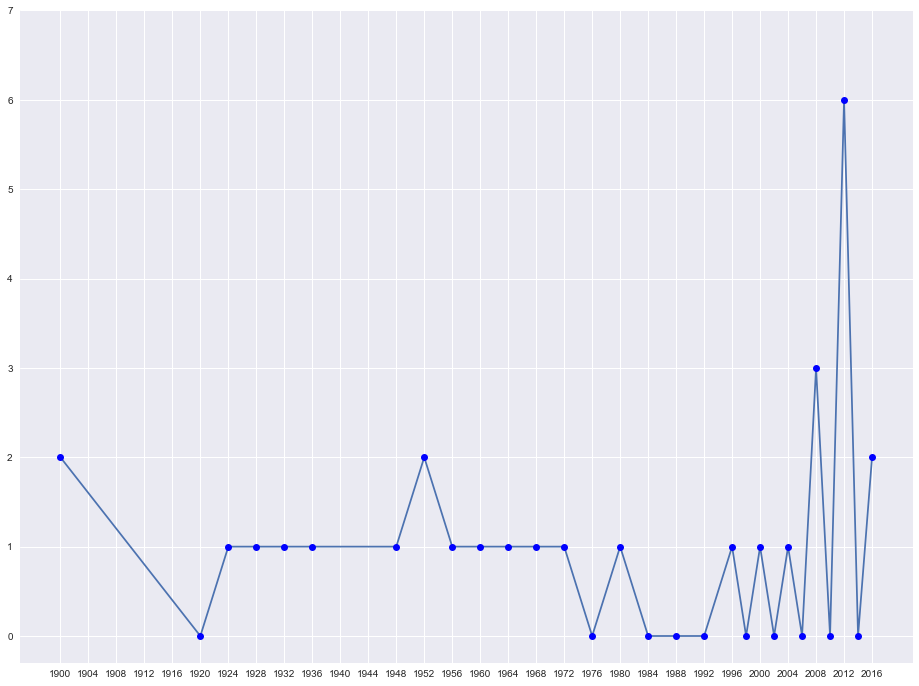

In [390]:
plt.plot(dfindyear.Year,dfindyear.allmedals)
plt.plot(dfindyear.Year,dfindyear.allmedals,'bo')
plt.yticks(range(0,8))
plt.xticks(range(1900,2018,4))
plt.show()

### Not a great looking graph. 2012 is the best year for INDIA with 6 medals.

# <font color = 'brown'> END NOTES:

- There's a lot more that can be extracted from this data.
- I have not higher level visualizations, they look so basic. Need to learn plotly.
- 80% of the tasks are done simply using the powerful groupby.
- Code once written was never optimized, cuz I'm dont wanna spend a lot of time in this project.
- Lastly, Please suggest me the improvizations that can be done and point out mistakes I have done.

__THANK YOU__ 

__SAITEJA NAKKA__